In [ ]:
import numpy as np
from scipy.stats import norm


# indicator_(1,2)(X)
def w(x):
    return np.where((1 <= x) & (x <= 2), 1, 0)

I_true = norm.cdf(2) - norm.cdf(1)

rng = np.random.default_rng()

In [119]:
%%script echo skipping # 1a, 1b
from tqdm.notebook import tqdm


N = 100_000
se_true = np.sqrt( (I_true - I_true**2)/(N-1) )

# [1, 2, 3, ..., N]
samples_num = np.arange(1,N+1)

# X ~ N(0,1)
X = rng.normal(loc=0, scale=1, size=N)
Y = w(X)

# I_hat = [Y_1, (Y_1+Y_2)/2, ...]
I_hat = np.cumsum(Y) / samples_num
print(f'{"I_true":10} {I_true}')
print(f'{"I"     :10} {I_hat[-1]}')

se_hat = np.empty(N)

for n in tqdm(range(1, N+1)):
    if n == 1:
        se_hat[n-1] = np.inf
    else:
        # s = np.sqrt( 1/(n-1)*np.sum(np.square(Y[:n]-I_hat[:n])) )
        # s = np.linalg.norm(Y[:n]-I_hat[:n])/np.sqrt(n-1)
        inter = Y[:n]-I_hat[n-1]

        # s^2
        s2 = np.einsum('i,i->', inter, inter) / (n-1)
        se_hat[n-1] = np.sqrt(s2/n)

print()
print(f'{"se_true":10} {se_true}')
print(f'{"se_hat" :10} {se_hat[-1]}')

skipping # 1a, 1b


In [120]:
# %%script echo skipping # 1c
# Samples
N_samples = 10_000
# Simulations
B_simulations = 1_000

def sample_normal(std, size: int | tuple[int, int]):
    return rng.normal(loc=1.5, scale=std, size=size)

def pdf_normal(std, x):
    return norm.pdf(x, loc=1.5, scale=std)

In [121]:
%%script echo skipping # 1c_1
for v in [.1, 1, 10]:
    X = sample_g(v, (B, N))
    Y = w(X) * norm.pdf(X) / pdf_g(v, X)
    I_hat: np.ndarray = Y.mean(axis=1)
    
    print()
    print(f'{"I_true":10} {I_true}')
    print(f'{"I"     :10} {I_hat.mean()}')
    # break

skipping # 1c_1


In [122]:
# %%script echo skipping # 1c_2
from tqdm.notebook import tqdm

I_hat: dict[float, np.array] = dict()
# v_deviations = [.1, 1, 10]
v_deviations = [10]

for v in v_deviations:
    # I_hat = np.empty(B)
    I_hat[v] = np.empty(B_simulations)
    for i in tqdm(range(B_simulations)):
        X = sample_normal(v, N_samples)
        # Y = w(X) * norm.pdf(X) / pdf_g(v, X)
        
        wf_X = np.einsum('i,i->i', w(X), norm.pdf(X))
        I_hat[v][i] = np.einsum('i,i', wf_X, 1/pdf_normal(v, X))/N_samples
    
    print()
    print(f'{"I_true":10} {I_true}')
    print(f'{"I"     :10} {I_hat[v].mean()}')
    # break

  0%|          | 0/1000 [00:00<?, ?it/s]


I_true     0.13590512198327787
I          0.13589134402966432


24


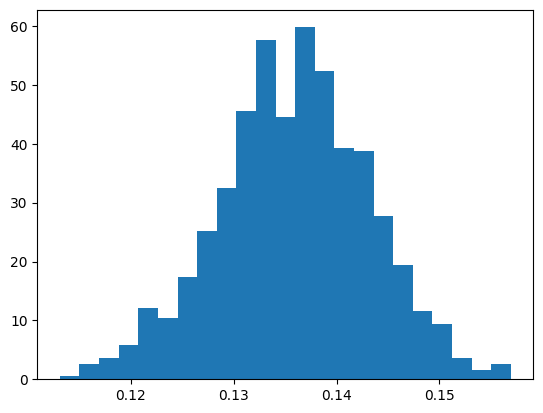

In [123]:
import matplotlib.pyplot as plt

# x_plt = list(range(1,N+1))

# plt.figure(figsize=(12, 8))
# plt.plot(x_plt, I_true)

for v in v_deviations:
    n, bins, patches = plt.hist(I_hat[v], density=True, bins='auto')
    print(len(bins))
    break

In [124]:
%reset -f